In [1]:
import pandas as pd
import datetime
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#master_vix_df = pd.read_csv('master_vix_data.csv',index_col=0)
master_spy_df = pd.read_csv('master_spy_data.csv',index_col=0)
# master_df_one_longs = pd.read_csv('one_longs.csv',index_col=0)
# master_df_one_shorts = pd.read_csv('one_shorts.csv',index_col=0)
# master_df_two_longs = pd.read_csv('two_longs.csv',index_col=0)
# master_df_two_shorts = pd.read_csv('two_shorts.csv',index_col=0)
# master_df_three_longs = pd.read_csv('three_longs.csv',index_col=0)
# master_df_three_shorts = pd.read_csv('three_shorts.csv',index_col=0)

In [3]:
master_df_one_longs['pnl'] = master_df_one_longs['one_long_closes']-master_df_one_longs['one_long_opens']
master_df_one_shorts['pnl'] = master_df_one_shorts['one_short_opens']-master_df_one_shorts['one_short_closes']
master_df_two_longs['pnl'] = master_df_two_longs['two_long_closes']-master_df_two_longs['two_long_opens']
master_df_two_shorts['pnl'] = master_df_two_shorts['two_short_opens']-master_df_two_shorts['two_short_closes']
master_df_three_longs['pnl'] = master_df_three_longs['three_long_closes']-master_df_three_longs['three_long_opens']
master_df_three_shorts['pnl'] = master_df_three_shorts['three_short_opens']-master_df_three_shorts['three_short_closes']

NameError: name 'master_df_one_longs' is not defined

In [4]:
master_df_one_longs

NameError: name 'master_df_one_longs' is not defined

In [5]:
master_df_one_shorts

NameError: name 'master_df_one_shorts' is not defined

In [6]:
master_df_two_longs

NameError: name 'master_df_two_longs' is not defined

In [7]:
master_df_two_shorts

NameError: name 'master_df_two_shorts' is not defined

In [8]:
master_df_three_longs

NameError: name 'master_df_three_longs' is not defined

In [ ]:
master_df_three_shorts

In [ ]:
master_df_one_longs['pnl'].sum()

In [ ]:
master_df_one_shorts['pnl'].sum()

In [ ]:
master_df_two_longs['pnl'].sum()

In [ ]:
master_df_two_shorts['pnl'].sum()

In [ ]:
master_df_three_longs['pnl'].sum()

In [ ]:
master_df_three_shorts['pnl'].sum()

In [9]:
master_spy_df['prices'].astype(dtype='float').plot()

NameError: name 'master_spy_df' is not defined

In [ ]:
master_vix_df['prices'].plot()

In [4]:
master_spy_df['change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=1)
master_spy_df['2_min_change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=2)
#master_vix_df['change'] = master_vix_df['prices'].diff(periods=1)
master_spy_df['5_min_change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=5)
master_spy_df['10_min_change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=10)
master_spy_df['15_min_change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=15)
master_spy_df['20_min_change'] = master_spy_df['prices'].astype(dtype='float').diff(periods=20)
master_spy_df['10_ma'] = master_spy_df['prices'].rolling(10).mean()
master_spy_df['20_ma'] = master_spy_df['prices'].rolling(20).mean()
master_spy_df['50_ma'] = master_spy_df['prices'].rolling(50).mean()
master_spy_df['100_ma'] = master_spy_df['prices'].rolling(100).mean()
master_spy_df['200_ma'] = master_spy_df['prices'].rolling(200).mean()
master_spy_df['fast'] = master_spy_df['prices'].ewm(span=12, min_periods=12).mean()
master_spy_df['slow'] = master_spy_df['prices'].ewm(span=26, min_periods=26).mean()
master_spy_df['macd'] = master_spy_df['fast']-master_spy_df['slow']
master_spy_df['signal'] = master_spy_df['macd'].ewm(span=9).mean()
master_spy_df['BB_20_upper_2std'] = (master_spy_df['prices'].rolling(20).std()*2) + master_spy_df['20_ma']
master_spy_df['BB_20_lower_2std'] = master_spy_df['20_ma'] - (master_spy_df['prices'].rolling(20).std()*2)
# master_vix_df['5_ma'] = master_vix_df['prices'].rolling(5).mean()
# master_vix_df['9_ma'] = master_vix_df['prices'].rolling(9).mean()
# master_vix_df['10_ma'] = master_vix_df['prices'].rolling(10).mean()
# master_vix_df['20_ma'] = master_vix_df['prices'].rolling(20).mean()
# master_vix_df['50_ma'] = master_vix_df['prices'].rolling(50).mean()
# master_vix_df['100_ma'] = master_vix_df['prices'].rolling(100).mean()

In [ ]:
#####################################################
##vix 20-50 bullish cross (expect SPY to fall)#######
#####################################################
minute_changes = []
five_minute_changes = []
ten_minute_changes = []
fifteen_minute_changes = []
twenty_minute_changes = []
for i in master_vix_df.index:
    if master_vix_df['20_ma'].iloc[i] > master_vix_df['50_ma'].iloc[i] and master_vix_df['20_ma'].iloc[i-1] < master_vix_df['50_ma'].iloc[i-1]:
        try:
            minute_changes.append(master_spy_df['change'].iloc[i+1])
            five_minute_changes.append(master_spy_df['5_min_change'].iloc[i+5])
            ten_minute_changes.append(master_spy_df['10_min_change'].iloc[i+10])
            fifteen_minute_changes.append(master_spy_df['15_min_change'].iloc[i+15])
            twenty_minute_changes.append(master_spy_df['20_min_change'].iloc[i+20])
        except:
            pass
minute_changes = np.array(minute_changes)
five_minute_changes = np.array(five_minute_changes)
ten_minute_changes = np.array(ten_minute_changes)
fifteen_minute_changes = np.array(fifteen_minute_changes)
twenty_minute_changes = np.array(twenty_minute_changes)

In [ ]:
minute_changes.mean()

In [ ]:
five_minute_changes.mean()

In [ ]:
ten_minute_changes.mean()

In [ ]:
fifteen_minute_changes.mean()

In [ ]:
twenty_minute_changes.mean()

In [ ]:
minute_changes.std()

In [ ]:
five_minute_changes.std()

In [ ]:
ten_minute_changes.std()

In [ ]:
fifteen_minute_changes.std()

In [ ]:
twenty_minute_changes.std()

In [ ]:
master_spy_df['15_min_change'].astype(dtype='float').std()

In [ ]:
#####################################################
##vix 20-50 bearish cross (expect SPY to rise)#######
#####################################################
minute_changes = []
five_minute_changes = []
ten_minute_changes = []
fifteen_minute_changes = []
twenty_minute_changes = []
for i in master_vix_df.index:
    if master_vix_df['20_ma'].iloc[i] < master_vix_df['50_ma'].iloc[i] and master_vix_df['20_ma'].iloc[i-1] > master_vix_df['50_ma'].iloc[i-1]:
        try:
            minute_changes.append(master_spy_df['change'].iloc[i+1])
            five_minute_changes.append(master_spy_df['5_min_change'].iloc[i+5])
            ten_minute_changes.append(master_spy_df['10_min_change'].iloc[i+10])
            fifteen_minute_changes.append(master_spy_df['15_min_change'].iloc[i+15])
            twenty_minute_changes.append(master_spy_df['20_min_change'].iloc[i+20])
        except:
            pass
minute_changes = np.array(minute_changes)
five_minute_changes = np.array(five_minute_changes)
ten_minute_changes = np.array(ten_minute_changes)
fifteen_minute_changes = np.array(fifteen_minute_changes)
twenty_minute_changes = np.array(twenty_minute_changes)

In [ ]:
minute_changes.mean()

In [ ]:
five_minute_changes.mean()

In [ ]:
ten_minute_changes.mean()

In [ ]:
twenty_minute_changes.mean()

In [ ]:
#####################################################
##vix 9-20 bullish cross (expect SPY to fall)#######
#####################################################
minute_changes = []
five_minute_changes = []
ten_minute_changes = []
fifteen_minute_changes = []
twenty_minute_changes = []
for i in master_vix_df.index:
    if master_vix_df['9_ma'].iloc[i] > master_vix_df['20_ma'].iloc[i] and master_vix_df['9_ma'].iloc[i-1] < master_vix_df['20_ma'].iloc[i-1]:
        try:
            minute_changes.append(master_spy_df['change'].iloc[i+1])
            five_minute_changes.append(master_spy_df['5_min_change'].iloc[i+5])
            ten_minute_changes.append(master_spy_df['10_min_change'].iloc[i+10])
            fifteen_minute_changes.append(master_spy_df['15_min_change'].iloc[i+15])
            twenty_minute_changes.append(master_spy_df['20_min_change'].iloc[i+20])
        except:
            pass
minute_changes = np.array(minute_changes)
five_minute_changes = np.array(five_minute_changes)
ten_minute_changes = np.array(ten_minute_changes)
fifteen_minute_changes = np.array(fifteen_minute_changes)
twenty_minute_changes = np.array(twenty_minute_changes)

In [ ]:
minute_changes.mean()

In [ ]:
five_minute_changes.mean()

In [ ]:
ten_minute_changes.mean()

In [ ]:
fifteen_minute_changes.mean()

In [ ]:
twenty_minute_changes.mean()

In [ ]:
minute_changes

In [ ]:
five_minute_changes

In [ ]:
ten_minute_changes

In [ ]:
#####################################################
##vix 9-20 bearish cross (expect SPY to rise)#######
#####################################################
minute_changes = []
five_minute_changes = []
ten_minute_changes = []
fifteen_minute_changes = []
twenty_minute_changes = []
for i in master_vix_df.index:
    if master_vix_df['9_ma'].iloc[i] < master_vix_df['20_ma'].iloc[i] and master_vix_df['9_ma'].iloc[i-1] > master_vix_df['20_ma'].iloc[i-1]:
        try:
            minute_changes.append(master_spy_df['change'].iloc[i+1])
            five_minute_changes.append(master_spy_df['5_min_change'].iloc[i+5])
            ten_minute_changes.append(master_spy_df['10_min_change'].iloc[i+10])
            fifteen_minute_changes.append(master_spy_df['15_min_change'].iloc[i+15])
            twenty_minute_changes.append(master_spy_df['20_min_change'].iloc[i+20])
        except:
            pass
minute_changes = np.array(minute_changes)
five_minute_changes = np.array(five_minute_changes)
ten_minute_changes = np.array(ten_minute_changes)
fifteen_minute_changes = np.array(fifteen_minute_changes)
twenty_minute_changes = np.array(twenty_minute_changes)

In [ ]:
minute_changes.mean()

In [ ]:
five_minute_changes.mean()

In [ ]:
ten_minute_changes.mean()

In [ ]:
fifteen_minute_changes.mean()

In [ ]:
twenty_minute_changes.mean()

In [ ]:
len(minute_changes[minute_changes>0])/len(minute_changes)

In [ ]:
len(five_minute_changes[five_minute_changes>0])/len(five_minute_changes)

In [ ]:
len(ten_minute_changes[ten_minute_changes>0])/len(ten_minute_changes)

In [ ]:
len(fifteen_minute_changes[fifteen_minute_changes>0])/len(fifteen_minute_changes)

In [ ]:
len(twenty_minute_changes[twenty_minute_changes>0])/len(twenty_minute_changes)

In [ ]:
master_spy_df.head()

In [ ]:
change_differences.mean()

In [ ]:
master_spy_df.tail()

In [ ]:
master_vix_df.tail()

In [ ]:
master_spy_df.head()

In [ ]:
master_vix_df.head()

In [ ]:
for i in master_vix_df.index: 
    if master_vix_df['times'][i] not in list(master_spy_df['times']):
        master_vix_df.drop(index=i,inplace=True)
for i in master_spy_df.index: 
    if master_spy_df['times'][i] not in list(master_vix_df['times']):
        master_spy_df.drop(index=i,inplace=True)

In [ ]:
master_vix_df.tail()

In [ ]:
master_spy_df.tail()

In [ ]:
change_differences = (master_vix_df['change']*-1) - master_spy_df['change']

In [ ]:
z_scores = (change_differences - change_differences.mean())/change_differences.std()

In [ ]:
master_spy_df.reset_index(inplace=True)
master_vix_df.reset_index(inplace=True)

In [ ]:
change_differences = (master_vix_df['change']*-1) - master_spy_df['change']
change_differences.dropna(inplace=True)
z_scores = (change_differences - change_differences.mean())/change_differences.std()

In [ ]:
change_differences.std()

In [ ]:
previous_change_differences = []
next_change_differences = []
z_score_location = []
spy_changes = []
vix_changes = []

for i in z_scores.index:
    if z_scores[i] > 2:
        previous_change_differences.append(change_differences[i-1])
        next_change_differences.append(change_differences[i+1])
        z_score_location.append(master_spy_df['times'][i])
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])
        
spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)
previous_change_differences = np.array(previous_change_differences)
next_change_differences = np.array(next_change_differences)

In [ ]:
len(previous_change_differences)

In [ ]:
len(next_change_differences)

In [ ]:
next_change_differences

In [ ]:
previous_change_differences

In [ ]:
next_change_differences.mean()

In [ ]:
previous_change_differences.mean()

In [ ]:
next_change_differences.sum()

In [ ]:
change_differences.mean()

In [ ]:
len(next_change_differences[next_change_differences<-0.01])/len(next_change_differences)

In [ ]:
next_change_differences.sum()

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
vix_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(vix_changes[vix_changes>0])/len(vix_changes)

In [ ]:
len(spy_changes[spy_changes<0])/len(spy_changes)

In [ ]:
previous_change_differences = []
next_change_differences = []
z_score_location = []
spy_changes = []
vix_changes = []

for i in z_scores.index:
    if z_scores[i] < -2:
        try:
            previous_change_differences.append(change_differences[i-1])
            next_change_differences.append(change_differences[i+1])
            z_score_location.append(i)
            spy_changes.append(master_spy_df['change'][i+1])
            vix_changes.append(master_vix_df['change'][i+1])
        except:
            print('no')
            pass
        
spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)
previous_change_differences = np.array(previous_change_differences)
next_change_differences = np.array(next_change_differences)
    

In [ ]:
len(previous_change_differences)

In [ ]:
len(next_change_differences)

In [ ]:
next_change_differences

In [ ]:
previous_change_differences

In [ ]:
next_change_differences.mean()

In [ ]:
previous_change_differences.mean()

In [ ]:
next_change_differences.sum()

In [ ]:
change_differences.mean()

In [ ]:
len(next_change_differences[next_change_differences>0.01])/len(next_change_differences)

In [ ]:
next_change_differences.sum()

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
vix_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(spy_changes[spy_changes > 0])/len(spy_changes)

In [ ]:
len(vix_changes[vix_changes<0])/len(vix_changes)

In [ ]:
master_spy_df['change'].sum()

In [ ]:
spy_changes = []
vix_changes = []

mylist = []
for i in master_spy_df['change'].index:
    if master_spy_df['change'][i] > .20:
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])
        
spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)

In [ ]:
len(spy_changes)

In [ ]:
spy_changes[spy_changes>0].mean()

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
len(spy_changes[spy_changes<0])/len(spy_changes)

In [ ]:
len(spy_changes[spy_changes>0])/len(spy_changes)

In [ ]:
vix_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(vix_changes[vix_changes<0])/len(vix_changes)

In [ ]:
spy_changes = []
vix_changes = []

mylist = []
for i in master_spy_df['change'].index:
    if master_spy_df['change'][i] < -.20:
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])
        
spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)

In [ ]:
len(spy_changes)

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
vix_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(spy_changes[spy_changes>0])/len(spy_changes)

In [ ]:
len(vix_changes[vix_changes>0])/len(vix_changes)

In [ ]:
master_vix_df['change'].std()*2

In [ ]:
master_spy_df['change'].std()*2

In [ ]:
spy_changes = []
vix_changes = []

mylist = []
for i in master_spy_df['change'].index:
    if master_spy_df['change'][i] > .10:
        x +=1
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])
        
spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
vix_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(spy_changes)

In [ ]:
len(spy_changes[spy_changes>0])/len(spy_changes)

In [ ]:
len(vix_changes[vix_changes<0])/len(vix_changes)

In [ ]:
spy_changes = []
vix_changes = []

mylist = []
for i in master_spy_df['change'].index:
    if master_spy_df['change'][i] < -.10:
        x +=1
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])

spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)

In [ ]:
spy_changes.sum()

In [ ]:
spy_changes.mean()

In [ ]:
vix_changes.sum()

In [ ]:
len(spy_changes)

In [ ]:
vix_changes.mean()

In [ ]:
len(vix_changes[vix_changes>0])/len(vix_changes)

In [ ]:
len(spy_changes[spy_changes>0])/len(spy_changes)

In [ ]:
spy_changes = []
vix_changes = []

mylist = []
for i in master_spy_df['change'].index:
    if master_vix_df['change'][i] > 0.05:
        spy_changes.append(master_spy_df['change'][i+1])
        vix_changes.append(master_vix_df['change'][i+1])

spy_changes = np.array(spy_changes)
vix_changes = np.array(vix_changes)

In [ ]:
spy_changes.mean()

In [ ]:
spy_changes.sum()

In [ ]:
len(spy_changes[spy_changes<0])/len(spy_changes)

In [ ]:
len(spy_changes)

In [ ]:
master_spy_df.head()

In [ ]:
############################################
##MACD/signal line cross with 50 MA cross###
############################################
spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []

for i in master_spy_df['change'].index:
    if master_spy_df['prices'][i] > master_spy_df['50_ma'][i] and master_spy_df['prices'][i-1]<=master_spy_df['50_ma'][i-1]:
        if master_spy_df['macd'][i] > master_spy_df['signal'][i] and master_spy_df['macd'][i-1] <= master_spy_df['signal'][i-1]:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])   

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())

In [ ]:
len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5)

In [ ]:
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
############################################
##MACD zero line cross with 50 MA cross####
############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []

for i in master_spy_df['change'].index:
    if master_spy_df['prices'][i] > master_spy_df['50_ma'][i] and master_spy_df['prices'][i-1]<=master_spy_df['50_ma'][i-1]:
        if master_spy_df['macd'][i] > 0 and master_spy_df['macd'][i-1] <= 0:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
###########################
##MACD zero line cross ####
###########################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []

for i in master_spy_df['change'].index:
    if master_spy_df['macd'][i] > 0 and master_spy_df['macd'][i-1] <= 0:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##moving average 20/50 golden cross ###########
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []
for i in master_spy_df['change'].index:
    if master_spy_df['20_ma'][i] > master_spy_df['50_ma'][i] and master_spy_df['20_ma'][i-1] < master_spy_df['50_ma'][i-1]:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append(master_spy_df['times'][i])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##moving average 20/50 death cross ###########
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []
for i in master_spy_df['change'].index:
    if master_spy_df['20_ma'][i] < master_spy_df['50_ma'][i] and master_spy_df['20_ma'][i-1] > master_spy_df['50_ma'][i-1]:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append(master_spy_df['times'][i])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands #############################
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []
for i in master_spy_df['change'].index[1:-10]:
    if master_spy_df['prices'][i] < master_spy_df['BB_20_lower_2std'][i] and not master_spy_df['prices'][i-1] < master_spy_df['BB_20_lower_2std'][i] and not str(i)[-4:]=='8300':
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append(master_spy_df['times'][i])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_10)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands #############################
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []
for i in master_spy_df['change'].index[1:-10]:
    if master_spy_df['prices'][i] > master_spy_df['BB_20_upper_2std'][i] and not master_spy_df['prices'][i-1] > master_spy_df['BB_20_upper_2std'][i]:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_10)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1<0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5<0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10<0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands w/ macd#############################
###############################################

spy_changes_1 = []
spy_changes_2 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    below_bb = []
    if master_spy_df['macd'][i] > master_spy_df['signal'][i] and master_spy_df['macd'][i-1] < master_spy_df['signal'][i-1]:
        for x in range(1,10):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            below_bb.append(master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x])
        if True in below_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_2.append(master_spy_df['2_min_change'][i+2])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_2 = np.array(spy_changes_2)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_2.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_2.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_2[spy_changes_2>0])/len(spy_changes_2))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
locations

In [ ]:
###############################################
##bollinger bands w/ macd#############################
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    above_bb = []
    if master_spy_df['macd'][i] < master_spy_df['signal'][i] and master_spy_df['macd'][i-1] > master_spy_df['signal'][i-1]:
        for x in range(1,10):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            above_bb.append(master_spy_df['prices'][i-x] > master_spy_df['BB_20_upper_2std'][i-x])
        if True in above_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))


spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands w/ macd#############################
###############################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    below_bb = []
    if master_spy_df['macd'][i] < 0 and master_spy_df['macd'][i] > master_spy_df['signal'][i] and master_spy_df['macd'][i-1] < master_spy_df['signal'][i-1]:
        for x in range(1,20):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            below_bb.append(master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x])
        if True in below_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
########################################
##bollinger bands w/ macd###############
########################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    above_bb = []
    if master_spy_df['macd'][i] > 0 and master_spy_df['macd'][i] < master_spy_df['signal'][i] and master_spy_df['macd'][i-1] > master_spy_df['signal'][i-1]:
        for x in range(1,20):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            above_bb.append(master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x])
        if True in above_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
########################################
##macd###############
########################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    above_bb = []
    if master_spy_df['macd'][i] > 0 and master_spy_df['macd'][i] > master_spy_df['signal'][i] and master_spy_df['macd'][i-1] < master_spy_df['signal'][i-1]:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

In [ ]:
print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
########################################
##macd###############
########################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[1:-10]:
    above_bb = []
    if master_spy_df['macd'][i] < 0 and master_spy_df['macd'][i] < master_spy_df['signal'][i] and master_spy_df['macd'][i-1] > master_spy_df['signal'][i-1]:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])
        locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
print(len(spy_changes_1))
print(spy_changes_1.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands macd/bottom #################
###############################################

spy_changes_1 = []
spy_changes_2 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[10:-10]:
    below_bb = []
    if (master_spy_df['macd'][i-1]-master_spy_df['macd'][i-2]) <= 0 and (master_spy_df['macd'][i]-master_spy_df['macd'][i-1]) > 0:
        for x in range(1,10):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            below_bb.append(master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x])
        if True in below_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_2.append(master_spy_df['2_min_change'][i+2])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_2 = np.array(spy_changes_2)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
print(len(spy_changes_1))
print(spy_changes_1.mean())
print(spy_changes_2.mean())
print(spy_changes_5.mean())
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_2.sum())
print(spy_changes_5.sum())
print(spy_changes_10.sum())

print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_2[spy_changes_2>0])/len(spy_changes_2))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
###############################################
##bollinger bands macd top ####################
###############################################

spy_changes_1 = []
spy_changes_2 = []
spy_changes_5 = []
spy_changes_10 = []
locations = []

for i in master_spy_df['change'].index[10:-10]:
    above_bb = []
    if (master_spy_df['macd'][i-1]-master_spy_df['macd'][i-2]) >= 0 and (master_spy_df['macd'][i]-master_spy_df['macd'][i-1]) < 0:
        for x in range(1,10):
            #if master_spy_df['prices'][i-x] < master_spy_df['BB_20_lower_2std'][i-x]:
            above_bb.append(master_spy_df['prices'][i-x] > master_spy_df['BB_20_upper_2std'][i-x])
        if True in above_bb:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_2.append(master_spy_df['2_min_change'][i+2])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])
            locations.append((master_spy_df['times'][i],master_spy_df['10_min_change'][i+10]))
    

spy_changes_1 = np.array(spy_changes_1)
spy_changes_2 = np.array(spy_changes_2)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
print(len(spy_changes_1))
print(spy_changes_1.mean())
print(spy_changes_2.mean())
print(np.nanmean(spy_changes_5))
print(spy_changes_10.mean())
print(spy_changes_1.sum())
print(spy_changes_2.sum())
print(np.nansum(spy_changes_5))
print(spy_changes_10.sum())

print(len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1))
print(len(spy_changes_2[spy_changes_2>0])/len(spy_changes_2))
print(len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5))
print(len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10))

In [ ]:
len(master_spy_df['change'][master_spy_df['change']<0])/len(master_spy_df['change'])

In [ ]:
previous_10 = []
locations = []

for i in master_spy_df['change'].index[20:-10]:
    if master_spy_df['5_min_change'][i] >.50:
        previous_10.append(master_spy_df['change'][i-6])
    

previous_10 = np.array(previous_10)

In [ ]:
len(previous_10)

In [ ]:
previous_10.mean()

In [ ]:
len(previous_10[previous_10>0])/len(previous_10)

In [ ]:
previous_10[previous_10>0].mean()

In [ ]:
spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
previous_5 = []
ma_20 = []
ma_50 = []
ma_100 = []
ma_200 = []

for i in master_spy_df['prices'].index:
    if master_spy_df['change'][i] > .15:
        previous_5.append(master_spy_df['change'][i-6:i])
        ma_20.append(master_spy_df['20_ma'][i])
        ma_50.append(master_spy_df['50_ma'][i])
        ma_100.append(master_spy_df['100_ma'][i])
        ma_200.append(master_spy_df['200_ma'][i])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
sums = []
for i in previous_5:
    sums.append(i.sum())
sums = np.array(sums)

In [ ]:
sums.mean()

In [ ]:
previous_1 = []
for i in previous_5:
    try:
        previous_1.append(list(i)[-1])
    except:
        pass
previous_1 = np.array(previous_1)

In [ ]:
previous_1.mean()

In [ ]:
len(previous_1)

In [ ]:
ma50_over_200 = []
for i in range(len(previous_1)):
    if ma_50[i] > ma_200[i]:
        ma50_over_200.append(i)
    

In [ ]:
len(ma50_over_200)/len(ma_50)


In [ ]:
spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
previous_5 = []

for i in master_spy_df['prices'].index:
    if master_spy_df['change'][i] < -.15:
        previous_5.append(master_spy_df['change'][i-6:i])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
sums = []
for i in previous_5:
    sums.append(i.sum())
sums = np.array(sums)

In [ ]:
sums.mean()

In [ ]:
previous_1 = []
for i in previous_5:
    try:
        previous_1.append(list(i)[-1])
    except:
        pass
previous_1 = np.array(previous_1)

In [ ]:
len(previous_1)

In [ ]:
previous_1.mean()

In [ ]:
#########################################################################
###if sum of previous 5 is greater than .055 and previous change <.02####
#########################################################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []

for i in master_spy_df['prices'].index[6:-10]:
    if master_spy_df['change'][i-6:i].sum() >0.06 and master_spy_df['change'][i] >0.02:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['5_min_change'][i+5])
        spy_changes_10.append(master_spy_df['10_min_change'][i+10])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)
    

In [ ]:
len(spy_changes_1)

In [ ]:
len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1)

In [ ]:
spy_changes_1.sum()

In [ ]:
spy_changes_1.mean()

In [ ]:
#########################################################################
###if sum of previous 5 is greater than .055 and previous change <.02####
#########################################################################

spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []

for i in master_spy_df['prices'].index[6:-10]:
    if master_spy_df['prices'][i-6:i].sum() < 0.10:
        spy_changes_1.append(master_spy_df['change'][i+1])
        spy_changes_5.append(master_spy_df['price'][i+5])
        spy_changes_10.append(master_spy_df['change'][i+10])

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)

In [ ]:
len(spy_changes_1)

In [ ]:
print(sums)

In [ ]:
winning_num = []
for num in np.arange(-.30,.30,.01):
    spy_changes_1 = []
    spy_changes_5 = []
    spy_changes_10 = []

    for i in master_spy_df['prices'].index[6:-10]:
        if round(master_spy_df['change'][i],2) > num+.03 <num-0.03:
            spy_changes_1.append(master_spy_df['change'][i+1])
            spy_changes_5.append(master_spy_df['5_min_change'][i+5])
            spy_changes_10.append(master_spy_df['10_min_change'][i+10])

    spy_changes_1 = np.array(spy_changes_1)
    spy_changes_5 = np.array(spy_changes_5)
    spy_changes_10 = np.array(spy_changes_10)
    try:
        spy_1_percent_winner = len(spy_changes_1[spy_changes_1>0])/len(spy_changes_1)
        spy_5_percent_winner = len(spy_changes_5[spy_changes_5>0])/len(spy_changes_5)
        spy_10_percent_winner = len(spy_changes_10[spy_changes_10>0])/len(spy_changes_10)
    except:
        pass
    
    try:
        if spy_1_percent_winner >.60:
            winning_num.append(num)
        if spy_5_percent_winner >.60:
            winning_num.append(num)
        if spy_10_percent_winner >.60:
            winning_num.append(num)
    except:
        pass

In [ ]:
len(winning_num)

In [ ]:
symbols = []
csv_read = csv.reader(open('companylist_all.csv'))
for row in csv_read:
    if row[0] != 'Symbol':
        symbols.append(row[0])
        
x = len(symbols)

def get_data(symbol):
    url = requests.get(f'https://finance.yahoo.com/quote/{symbol}/history?p={symbol}.html')
    soup = bs(url.content,'html.parser')
    scripts = soup.find_all('script')
    fin_data = scripts[31]
    fin_data = str(fin_data).split('root.App.main = ')[1]
    fin_data = fin_data.split(';\n}(this));\n</script>')[0]
    fin_dict = json.loads(fin_data)
    historical_prices = fin_dict['context']['dispatcher']['stores']['HistoricalPriceStore']['prices']
    df = pd.DataFrame(historical_prices)
    df.sort_index(ascending=False,inplace=True)
    df['date'] = pd.to_datetime(df['date'],unit='s')
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %H:%M:%S').dt.strftime('%m/%d/%Y')
    df.set_index('date', inplace = True)
    df.dropna(subset =['open'],inplace=True)
    df[['adjclose','open','close','high','low','open']] = df[['adjclose','open','close','high','low','open']].round(2)
    


In [6]:
master_spy_df.tail()

,prices,times,change,2_min_change,5_min_change,10_min_change,15_min_change,20_min_change,10_ma,20_ma,50_ma,100_ma,200_ma,fast,slow,macd,signal,BB_20_upper_2std,BB_20_lower_2std
6134,323.750,12714560,0.140,-0.070,0.240,-0.360,-0.240,-0.0750,323.6600,323.785505,324.039156,324.269933,324.515682,323.721118,323.834067,-0.112949,-0.117982,324.128214,323.442796
6135,323.805,12714570,0.055,0.195,0.285,0.005,-0.125,0.0749,323.6605,323.789250,324.030002,324.260083,324.510132,323.734023,323.831914,-0.097891,-0.113964,324.131045,323.447455
6136,323.750,12714580,-0.055,0.000,0.140,0.000,-0.180,-0.0100,323.6605,323.788750,324.019602,324.249983,324.504882,323.736481,323.825846,-0.089366,-0.109044,324.130755,323.446745
6137,323.590,12714590,-0.160,-0.215,-0.230,-0.090,-0.400,-0.2100,323.6515,323.778250,324.003802,324.238883,324.498982,323.713945,323.808376,-0.094431,-0.106122,324.131510,323.424990
6138,323.510,1271500,-0.080,-0.240,-0.100,-0.040,-0.430,-0.4200,323.6475,323.757250,323.991002,324.226483,324.492682,323.682569,323.786274,-0.103705,-0.105638,324.122266,323.392234


In [32]:
master_spy_df['macd_difference'] = master_spy_df['macd']-master_spy_df['signal']
master_spy_df['macd_difference_avg'] = master_spy_df['macd_difference'].rolling(20).mean()

In [117]:
master_spy_df['upper_macd_std'] = master_spy_df['macd_difference_avg']+(master_spy_df['macd_difference'].std())
master_spy_df['lower_macd_std'] = master_spy_df['macd_difference_avg']-(master_spy_df['macd_difference'].std())

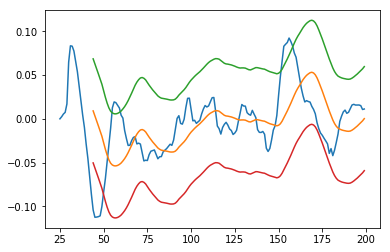

In [118]:
master_spy_df['macd_difference'][:200].plot()
master_spy_df['macd_difference_avg'][:200].plot()
master_spy_df['upper_macd_std'][:200].plot()
master_spy_df['lower_macd_std'][:200].plot()

In [128]:
short_enters = []
spy_changes_1 = []
spy_changes_5 = []
spy_changes_10 = []
spy_changes_15 = []
is_short = False
enter_i = 0
for i in master_spy_df.index[20:-20]:
    if master_spy_df['macd_difference'].iloc[i] > master_spy_df['upper_macd_std'].iloc[i] and not is_short:
        short_enters.append((i,master_spy_df['prices'].iloc[i]))
        spy_changes_1.append(master_spy_df['change'].iloc[i+1])
        spy_changes_5.append(master_spy_df['5_min_change'].iloc[i+5])
        spy_changes_10.append(master_spy_df['10_min_change'].iloc[i+10])
        spy_changes_15.append(master_spy_df['15_min_change'].iloc[i+15])
        is_short = True
        enter_i = i
    if i - enter_i >= 15:
        is_short = False
        
        
short_df = pd.DataFrame(short_enters,columns=['index','prices'])
short_df.set_index('index',inplace=True)

spy_changes_1 = np.array(spy_changes_1)
spy_changes_5 = np.array(spy_changes_5)
spy_changes_10 = np.array(spy_changes_10)
spy_changes_15 = np.array(spy_changes_15)

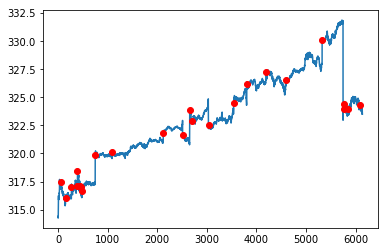

In [140]:
plt.plot(master_spy_df['prices'])
plt.plot(short_df,'ro')

In [121]:
len(spy_changes_5[spy_changes_5<0])/len(spy_changes_5)

0.6666666666666666

In [122]:
len(spy_changes_10[spy_changes_10<0])/len(spy_changes_10)

0.625

In [125]:
spy_changes_10.sum()

-2.619799999999998

In [124]:
spy_changes_5.sum()

-0.8298000000000343

In [126]:
print(spy_changes_5.mean())
print(spy_changes_10.mean())

-0.03457500000000143
-0.10915833333333325


In [127]:
spy_changes_1.sum()

-0.5269000000001256

In [129]:
spy_changes_15.sum()

-2.5880000000002497

In [133]:
master_spy_df.iloc[1]['times']

12128320.0